In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sri import SIRModel

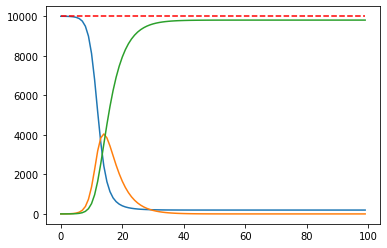

In [15]:
BETA=1.0
GAMMA=1/4
model=SIRModel(beta=BETA,gamma=GAMMA)
t=np.arange(0,100)
S0=10000
I0=1
R0=0
y_0=[S0,I0,R0]
y_t=model.predict(t,y_0)

plt.plot(t,y_t[0])
plt.plot(t,y_t[1])
plt.plot(t,y_t[2])
plt.plot(t,y_t[0]+y_t[1]+y_t[2],"r--")

In [16]:
model.beta_=0.95
model.gamma_=0.28
N=S0+I0
I=y_t[1]
R=y_t[2]
print(model.fit(t,N,I,R))

In [17]:
param_names=("BETA","GAMMA")
true_parms=(BETA,GAMMA)
for i, (p,true_p, name) in enumerate(zip(model.params,true_parms,param_names)):
    print( f"true value {name} = {true_p} ~ {p}  +/- {np.sqrt(model.params_cov_[i,i])}")

true value BETA = 1.0 ~ 1.0  +/- 2.784570650516736e-17
true value GAMMA = 0.25 ~ 0.24999999999999994  +/- 2.8506377425662733e-17
